# Clustering en Datos de Películas de Hollywood

## 1. Introducción
"""
Este trabajo práctico aplica técnicas de clustering a un conjunto de datos reales sobre películas de Hollywood. 
El objetivo es explorar estructuras latentes en los datos y analizar los resultados obtenidos con distintos algoritmos de agrupamiento: K-Means, DBSCAN y Clustering Jerárquico.
"""


In [1]:
## 2. Carga y Exploración del Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos 
hollywood_df = pd.read_csv('../data/Hollywood films.csv')

In [3]:
# Vista inicial
display(hollywood_df.head())
print("\nResumen del dataset:")
print(hollywood_df.info())
print("\nValores nulos por columna:")
print(hollywood_df.isnull().sum())

,year,movie,movie_id,certificate,duration,genre,rate,metascore,synopsis,votes,...,New_York_Film_Critics_Circle_nominated,New_York_Film_Critics_Circle_nominated_categories,Los_Angeles_Film_Critics_Association_won,Los_Angeles_Film_Critics_Association_won_categories,Los_Angeles_Film_Critics_Association_nominated,Los_Angeles_Film_Critics_Association_nominated_categories,release_date.year,release_date.month,release_date.day-of-month,release_date.day-of-week
0,2001,Kate & Leopold,tt0035423,PG-13,118,Comedy|Fantasy|Romance,6.4,44.0,An English Duke from 1876 is inadvertedly drag...,66660,...,0,NaN,0,NaN,0,NaN,2001.0,12.0,25.0,2.0
1,2000,Chicken Run,tt0120630,G,84,Animation|Adventure|Comedy,7.0,88.0,When a cockerel apparently flies into a chicke...,144475,...,1,Best Animated Film,1,Best Animation,1,Best Animation,2000.0,6.0,23.0,5.0
2,2005,Fantastic Four,tt0120667,PG-13,106,Action|Adventure|Family,5.7,40.0,A group of astronauts gain superpowers after a...,273203,...,0,NaN,0,NaN,0,NaN,2005.0,7.0,8.0,5.0
3,2002,Frida,tt0120679,R,123,Biography|Drama|Romance,7.4,61.0,"A biography of artist Frida Kahlo, who channel...",63852,...,0,NaN,0,NaN,0,NaN,2002.0,11.0,22.0,5.0
4,2001,The Lord of the Rings: The Fellowship of the Ring,tt0120737,PG-13,178,Adventure|Drama|Fantasy,8.8,92.0,A meek Hobbit from the Shire and eight compani...,1286275,...,0,NaN,1,Best Music,2,Best Music|Best Production Design,2001.0,12.0,19.0,3.0



Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Columns: 119 entries, year to release_date.day-of-week
dtypes: float64(10), int64(46), object(63)
memory usage: 1.2+ MB
None

Valores nulos por columna:
year                                                            0
movie                                                           1
movie_id                                                        0
certificate                                                    40
duration                                                        0
                                                             ... 
Los_Angeles_Film_Critics_Association_nominated_categories    1051
release_date.year                                              48
release_date.month                                             48
release_date.day-of-month                                      48
release_date.day-of-week                                       48
Length: 119, dtype: int64

## 3. Preprocesamiento

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
# Selección de características numéricas relevantes (ajustar según el dataset)
features = ['duration', 'rate', 'metascore', 'votes']
df = hollywood_df[features].dropna()

In [6]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

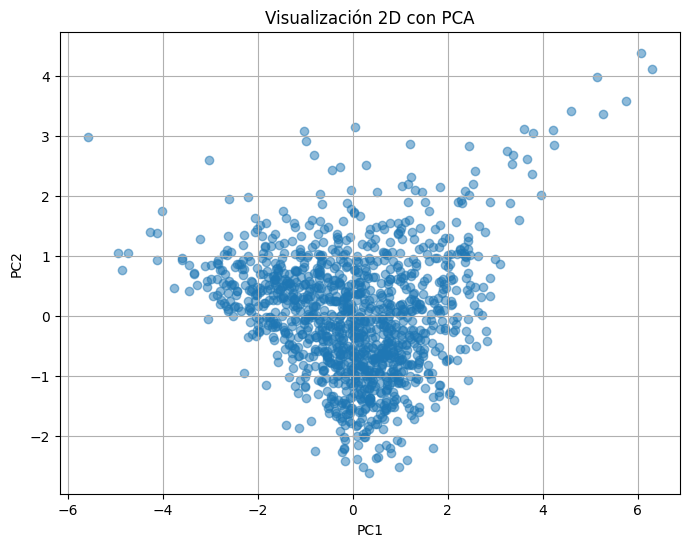

In [7]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("Visualización 2D con PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [9]:
## 4. K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
# Evaluación
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score (KMeans, k=3): {silhouette_kmeans:.3f}")

Silhouette Score (KMeans, k=3): 0.301


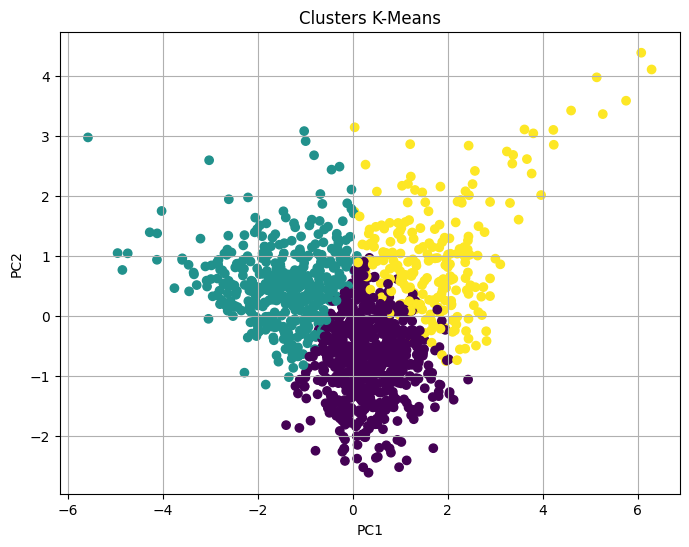

In [12]:
# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Clusters K-Means")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

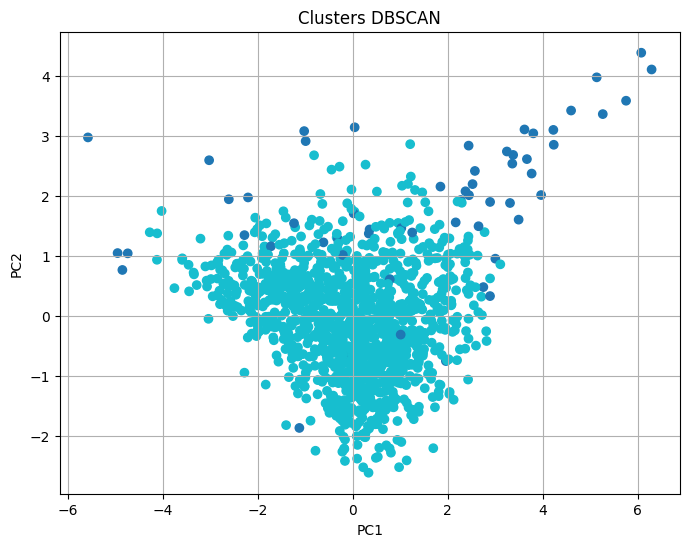

In [14]:
## 5. DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10')
plt.title("Clusters DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

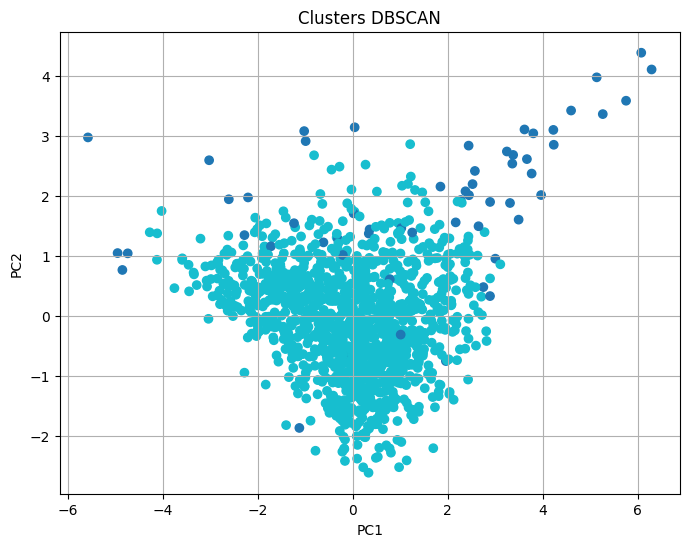

In [15]:
# Visualización
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10')
plt.title("Clusters DBSCAN")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()




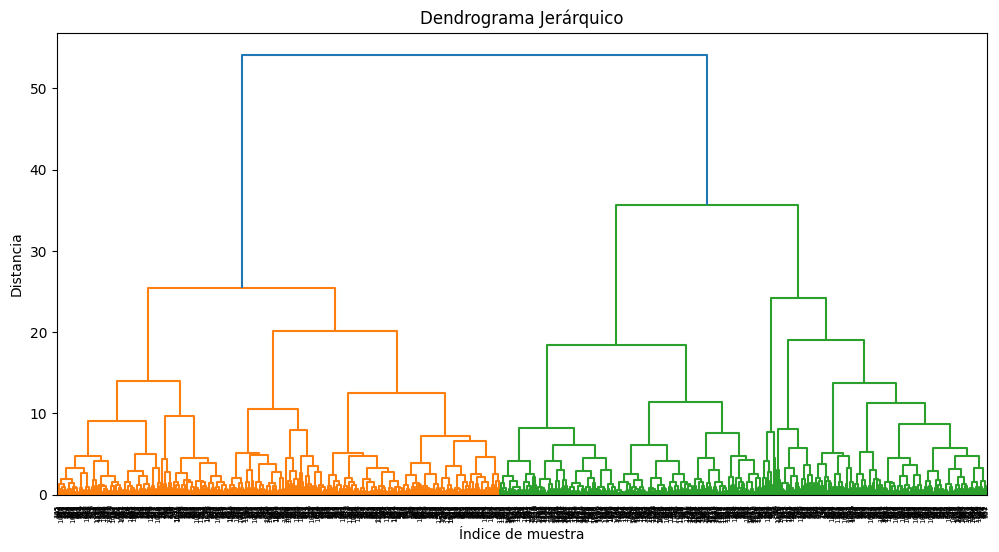

In [17]:
## 6. Clustering Jerárquico
from scipy.cluster.hierarchy import dendrogram, linkage

link = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(link)
plt.title("Dendrograma Jerárquico")
plt.xlabel("Índice de muestra")
plt.ylabel("Distancia")
plt.show()